# GFS

This demonstrates how to download and use GFS data. 

In [1]:
from herbie import Herbie
from herbie.toolbox import EasyMap, pc, ccrs
from herbie import paint

import matplotlib.pyplot as plt

In [2]:
H = Herbie("2021-07-11", model="gfs", product="pgrb2.0p25")

✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2021-Jul-11 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


In [3]:
# Show all available sources
H.SOURCES

{'aws': 'https://noaa-gfs-bdp-pds.s3.amazonaws.com/gfs.20210711/00/atmos/gfs.t00z.pgrb2.0p25.f000',
 'ftpprd': 'https://ftpprd.ncep.noaa.gov/data/nccf/com/gfs/prod/gfs.20210711/00/atmos/gfs.t00z.pgrb2.0p25.f000',
 'nomads': 'https://nomads.ncep.noaa.gov/pub/data/nccf/com/gfs/prod/gfs.20210711/00/atmos/gfs.t00z.pgrb2.0p25.f000',
 'google': 'https://storage.googleapis.com/global-forecast-system/gfs.20210711/00/atmos/gfs.t00z.pgrb2.0p25.f000',
 'azure': 'https://noaagfs.blob.core.windows.net/gfs/gfs.20210711/00/atmos/gfs.t00z.pgrb2.0p25.f000',
 'ncar_rda': 'https://data.rda.ucar.edu/d084001/2021/20210711/gfs.0p25.2021071100.f000.grib2'}

In [4]:
# Show all available products
H.PRODUCTS

{'pgrb2.0p25': 'common fields, 0.25 degree resolution',
 'pgrb2.0p50': 'common fields, 0.50 degree resolution',
 'pgrb2.1p00': 'common fields, 1.00 degree resolution',
 'pgrb2b.0p25': 'uncommon fields, 0.25 degree resolution',
 'pgrb2b.0p50': 'uncommon fields, 0.50 degree resolution',
 'pgrb2b.1p00': 'uncommon fields, 1.00 degree resolution',
 'pgrb2full.0p50': 'combined grids of 0.50 resolution',
 'sfluxgrb': 'surface flux fields, T1534 Semi-Lagrangian grid',
 'goesimpgrb2.0p25': ', 0.50 degree resolution'}

In [5]:
ds = H.xarray(":TMP:2 m above")

👨🏻‍🏭 Created directory: [/home/blaylock/data/gfs/20210711]


Text(0.0, 1.0, 'GFS: common fields, 0.25 degree resolution')

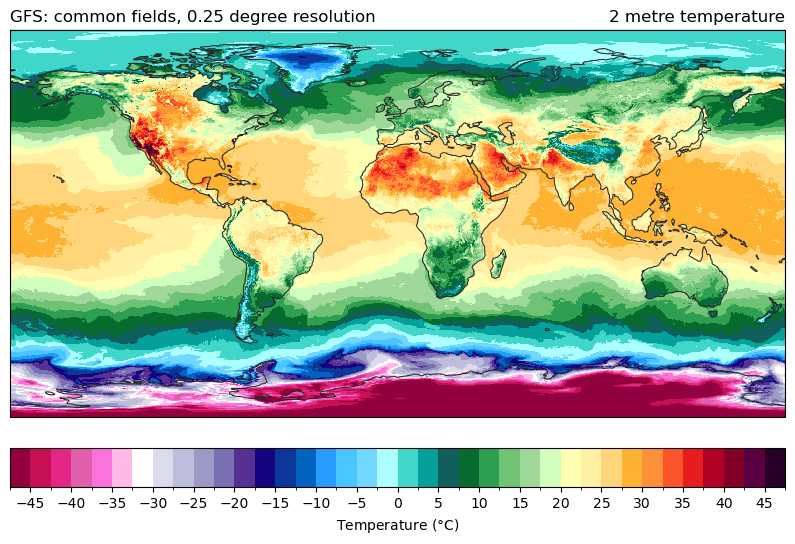

In [6]:
ax = EasyMap(crs=ds.herbie.crs, figsize=[10, 8]).ax
p = ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    ds.t2m - 273.15,
    transform=pc,
    **paint.NWSTemperature.kwargs2,
)
plt.colorbar(
    p, ax=ax, orientation="horizontal", pad=0.05, **paint.NWSTemperature.cbar_kwargs2
)

ax.set_title(ds.t2m.GRIB_name, loc="right")
ax.set_title(f"{ds.model.upper()}: {H.product_description}", loc="left")

Let's change it up and plot on a Geostationary projection.

Text(0.0, 1.0, 'GFS: common fields, 0.25 degree resolution')

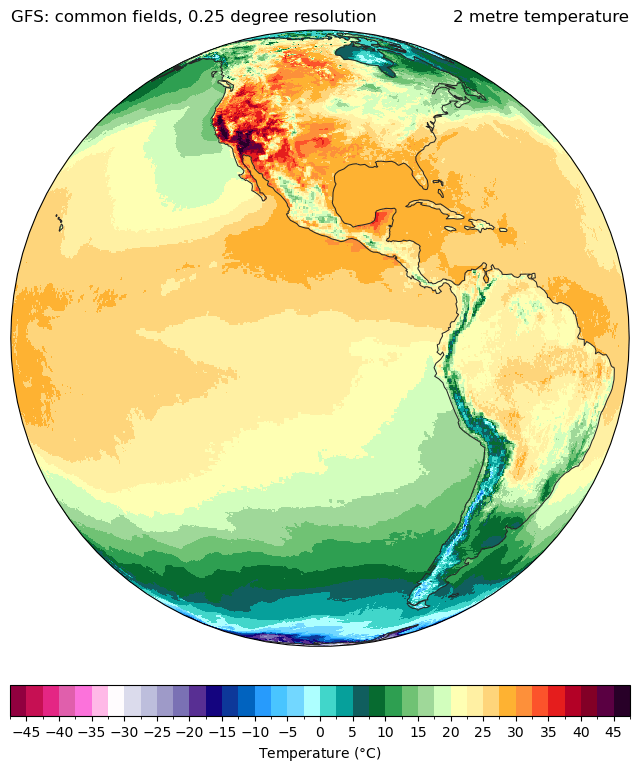

In [7]:
ax = EasyMap(crs=ccrs.Geostationary(central_longitude=-100), figsize=[10, 10]).ax

p = ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    ds.t2m - 273.15,
    transform=pc,
    **paint.NWSTemperature.kwargs2,
)
plt.colorbar(
    p,
    ax=ax,
    orientation="horizontal",
    pad=0.05,
    shrink=0.8,
    **paint.NWSTemperature.cbar_kwargs2,
)

ax.set_title(ds.t2m.GRIB_name, loc="right")
ax.set_title(f"{ds.model.upper()}: {H.product_description}", loc="left")

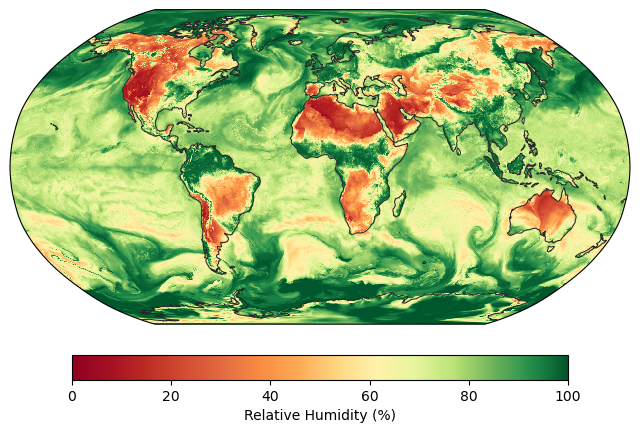

In [8]:
ds2 = H.xarray("RH:2 m above")

ax = EasyMap(crs=ccrs.Robinson(), figsize=[8, 8]).ax
p = ax.pcolormesh(
    ds2.longitude,
    ds2.latitude,
    ds2.r2,
    transform=pc,
    **paint.NWSRelativeHumidity.kwargs,
)

plt.colorbar(
    p,
    ax=ax,
    orientation="horizontal",
    pad=0.05,
    shrink=0.8,
    **paint.NWSRelativeHumidity.cbar_kwargs,
)

## GFS from [NCEI](https://www.ncei.noaa.gov/products/weather-climate-models/global-forecast)

Depending on the date, Herbie might find old GFS data at NCEI or RDA for dates older than January 1, 2021.

In [9]:
# Look for file in all available sources
H = Herbie("2020-06-01", model="gfs")

✅ Found ┊ model=gfs ┊ product=0.5-degree ┊ 2020-Jun-01 00:00 UTC F00 ┊ GRIB2 @ ncei_analysis ┊ IDX @ ncei_analysis


In [10]:
H.SOURCES, H.PRODUCTS

({'ncei_analysis': 'https://www.ncei.noaa.gov/data/global-forecast-system/access/grid-004-0.5-degree/analysis/202006/20200601/gfs_4_20200601_0000_000.grb2',
  'ncei_forecast': 'https://www.ncei.noaa.gov/data/global-forecast-system/access/grid-004-0.5-degree/forecast/202006/20200601/gfs_4_20200601_0000_000.grb2',
  'ncar_rda': 'https://data.rda.ucar.edu/d084001/2020/20200601/gfs.0p25.2020060100.f000.grib2'},
 {'0.5-degree': '0.5 degree grid', '1.0-degree': '1.0 degree grid'})

In [11]:
H.inventory("GRD:80 m above")

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
465,466,80208994,80496003.0,80208994-80496003,2020-06-01,2020-06-01,UGRD,80 m above ground,anl,:UGRD:80 m above ground:anl
466,467,80496004,80780823.0,80496004-80780823,2020-06-01,2020-06-01,VGRD,80 m above ground,anl,:VGRD:80 m above ground:anl


# GFS GraphCast

This demonstrates how to download and plot data from the experimental GFS GraphCast AI model.

In [22]:
H = Herbie("2024-05-10 12:00", model="graphcast", fxx=6)
H.SOURCES, H.PRODUCTS

✅ Found ┊ model=graphcast ┊ product=pgrb2.0p25 ┊ 2024-May-10 12:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws


({'aws': 'https://noaa-nws-graphcastgfs-pds.s3.amazonaws.com/graphcastgfs.20240510/12/forecasts_13_levels/graphcastgfs.t12z.pgrb2.0p25.f006'},
 {'pgrb2.0p25': 'common fields, 0.25 degree resolution'})

The current version of the GraphCast has a limited set of parameters on 13 different levels.

In [23]:
H.inventory()

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
0,1,0,3244678.0,0-3244678,2024-05-10 12:00:00,2024-05-10 18:00:00,VGRD,50 mb,6 hour fcst,:VGRD:50 mb:6 hour fcst
1,2,3244679,6489357.0,3244679-6489357,2024-05-10 12:00:00,2024-05-10 18:00:00,VGRD,100 mb,6 hour fcst,:VGRD:100 mb:6 hour fcst
2,3,6489358,9734036.0,6489358-9734036,2024-05-10 12:00:00,2024-05-10 18:00:00,VGRD,150 mb,6 hour fcst,:VGRD:150 mb:6 hour fcst
3,4,9734037,12978715.0,9734037-12978715,2024-05-10 12:00:00,2024-05-10 18:00:00,VGRD,200 mb,6 hour fcst,:VGRD:200 mb:6 hour fcst
4,5,12978716,16223394.0,12978716-16223394,2024-05-10 12:00:00,2024-05-10 18:00:00,VGRD,250 mb,6 hour fcst,:VGRD:250 mb:6 hour fcst
...,...,...,...,...,...,...,...,...,...,...
79,80,256329689,259574367.0,256329689-259574367,2024-05-10 12:00:00,2024-05-10 18:00:00,VVEL,600 mb,6 hour fcst,:VVEL:600 mb:6 hour fcst
80,81,259574368,262819046.0,259574368-262819046,2024-05-10 12:00:00,2024-05-10 18:00:00,VVEL,700 mb,6 hour fcst,:VVEL:700 mb:6 hour fcst
81,82,262819047,266063725.0,262819047-266063725,2024-05-10 12:00:00,2024-05-10 18:00:00,VVEL,850 mb,6 hour fcst,:VVEL:850 mb:6 hour fcst
82,83,266063726,269308404.0,266063726-269308404,2024-05-10 12:00:00,2024-05-10 18:00:00,VVEL,925 mb,6 hour fcst,:VVEL:925 mb:6 hour fcst


Plot 2m temperature

In [24]:
ds = H.xarray("TMP:2 m")

👨🏻‍🏭 Created directory: [/home/blaylock/data/graphcast/20240510]


Text(0.0, 1.0, 'GRAPHCAST: common fields, 0.25 degree resolution')

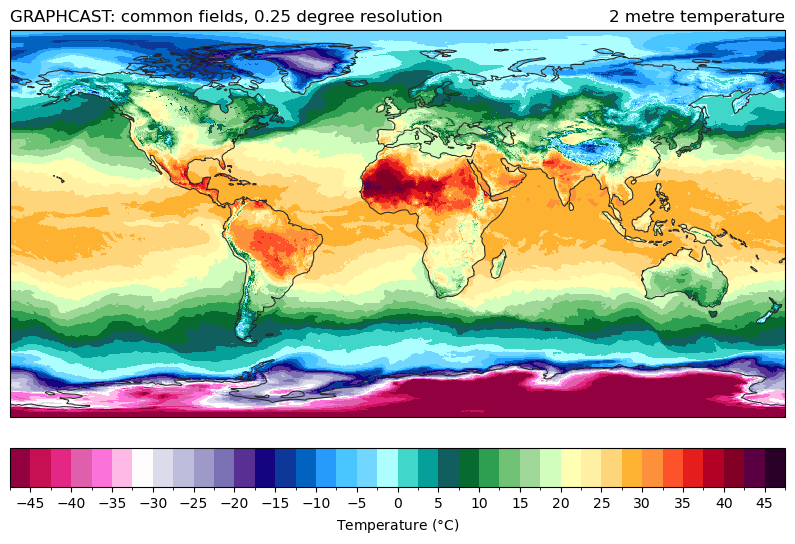

In [25]:
ax = EasyMap(crs=ds.herbie.crs, figsize=[10, 8]).ax
p = ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    ds.t2m - 273.15,
    transform=pc,
    **paint.NWSTemperature.kwargs2,
)
plt.colorbar(
    p, ax=ax, orientation="horizontal", pad=0.05, **paint.NWSTemperature.cbar_kwargs2
)

ax.set_title(ds.t2m.GRIB_name, loc="right")
ax.set_title(f"{ds.model.upper()}: {H.product_description}", loc="left")

# GFS wave data
This demonstrates getting data from the GFS wave output.

In [26]:
H = Herbie("2021-07-11", model="gfs_wave")

✅ Found ┊ model=gfs_wave ┊ product=arctic.9km ┊ 2021-Jul-11 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


In [27]:
H.inventory()

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
0,1,0,430315.0,0-430315,2021-07-11,2021-07-11,WIND,surface,anl,:WIND:surface:anl
1,2,430316,1049179.0,430316-1049179,2021-07-11,2021-07-11,WDIR,surface,anl,:WDIR:surface:anl
2,3,1049180,1480558.0,1049180-1480558,2021-07-11,2021-07-11,UGRD,surface,anl,:UGRD:surface:anl
3,4,1480559,1908976.0,1480559-1908976,2021-07-11,2021-07-11,VGRD,surface,anl,:VGRD:surface:anl
4,5,1908977,2174765.0,1908977-2174765,2021-07-11,2021-07-11,HTSGW,surface,anl,:HTSGW:surface:anl
5,6,2174766,2497195.0,2174766-2497195,2021-07-11,2021-07-11,PERPW,surface,anl,:PERPW:surface:anl
6,7,2497196,3016884.0,2497196-3016884,2021-07-11,2021-07-11,DIRPW,surface,anl,:DIRPW:surface:anl
7,8,3016885,3260188.0,3016885-3260188,2021-07-11,2021-07-11,WVHGT,surface,anl,:WVHGT:surface:anl
8,9,3260189,3529929.0,3260189-3529929,2021-07-11,2021-07-11,SWELL,1 in sequence,anl,:SWELL:1 in sequence:anl
9,10,3529930,3764422.0,3529930-3764422,2021-07-11,2021-07-11,SWELL,2 in sequence,anl,:SWELL:2 in sequence:anl


In [28]:
ds = H.xarray("SWELL:1 in sequence", remove_grib=False)
ds

👨🏻‍🏭 Created directory: [/home/blaylock/data/gfs_wave/20210711]


ECCODES ERROR   :  Polar stereographic Geoiterator: Only supported for spherical earth.
ECCODES ERROR   :  Geoiterator factory: Error instantiating iterator polar_stereographic (Problem with calculation of geographic attributes)
ECCODES ERROR   :  latitudes: Unable to create iterator


GeocalculusError: Problem with calculation of geographic attributes